# 4. Data Visualization 
## "Machine Predictive Maintenance Classification"
![img](https://device-insight.com/wp-content/uploads/2018/03/Predictive-Maintenance-e1644243465650.jpg)

Dataset Link: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

Dataset sintetik yang terdiri dari 10.000 titik data dalam baris dengan 10 fitur dalam kolom:

1. **UID**: pengidentifikasi unik berkisar dari 1 hingga 10.000
2. **productID**: terdiri dari huruf L, M, atau H
    L (low) untuk rendah (50% dari semua produk);
    
    M (medium) sedang (30%);  
    
    H (high) tinggi (20%);
    
    sebagai varian kualitas produk dan nomor seri spesifik varian.
    
    contoh: M14860
3. **air temperature [K]**: dihasilkan menggunakan proses random walk yang kemudian dinormalisasi ke deviasi standar 2 K sekitar 300 K
4. **process temperature [K]**: dihasilkan dengan proses random walk yang dinormalisasi ke deviasi standar 1 K, ditambahkan ke suhu udara ditambah 10 K.
5. **rotational speed [rpm]:** dihitung dari daya 2860 W, ditimpa dengan noise yang terdistribusi normal.
6. **torque [Nm]**: nilai torsi terdistribusi normal sekitar 40 Nm dengan  σ = 10 Nm dan tidak ada nilai negatif.
7. **tool wear [min]:** Varian kualitas H/M/L menambahkan 5/3/2 menit dari tool wear ke alat yang digunakan dalam proses.

dan **label 'machine failure'** yang menunjukkan, apakah mesin telah gagal pada titik data tertentu.

Target:
Terdapat dua Target
1. **Target** : Gagal atau Tidak
2. **Failure Type** : Tipe Kegagalan

## 1. Load Dataset

**ChatGPT Prompt:**

Saya akan melakukan visualisasi pada dataset Machine Predictive Maintenance. Berikan saya kode python untuk load dataset menggunakan library pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gantikan 'path_to_your_dataset.csv' dengan path dari file dataset Anda
path = '/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv'
dataset = pd.read_csv(path)

# Menampilkan 5 baris pertama dari dataset
print(dataset.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


## 2. EDA (Exploratory Data Analysis)

**ChatGPT Prompt:**

Berikan kode untuk mengetahui informasi, jumlah baris dan kolom, serta daftar kolom dari dataset yang telah di load

In [2]:
# Mendapatkan informasi dari dataset
print("Informasi Dataset:")
print(dataset.info())

# Mendapatkan jumlah baris dan kolom dari dataset
jumlah_baris, jumlah_kolom = dataset.shape
print("\nJumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

# Mendapatkan daftar kolom dari dataset
print("\nDaftar Kolom:")
print(dataset.columns)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None

Jumlah Baris: 10000
Jumlah Kolom: 10

Daftar Kolom:
Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotationa

**ChatGPT Prompt:**

Deskripsikan statistik dataset dan sajikan dalam bentuk tabel dengan warna menarik

In [5]:
# Mendapatkan statistik deskriptif dari dataset
deskripsi = dataset.describe()

# Mengatur style dan warna tabel
sns.set_style("whitegrid")
cm = sns.light_palette("blue", as_cmap=True)

# Menampilkan tabel dengan warna menarik
styled_table = deskripsi.style.background_gradient(cmap=cm)
display(styled_table)

# Jika Anda ingin menampilkan tabel dalam bentuk visual, Anda bisa menggunakan plt.show()
styled_table.bar(subset=["mean"], color='#d65f5f')
plt.show()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.895680,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.750000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.500000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.250000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


## 3. Data Visualization

**ChatGPT Prompt:**
    
Berikan saya code untuk plot distribusi kolom 'Air temperature [K]'

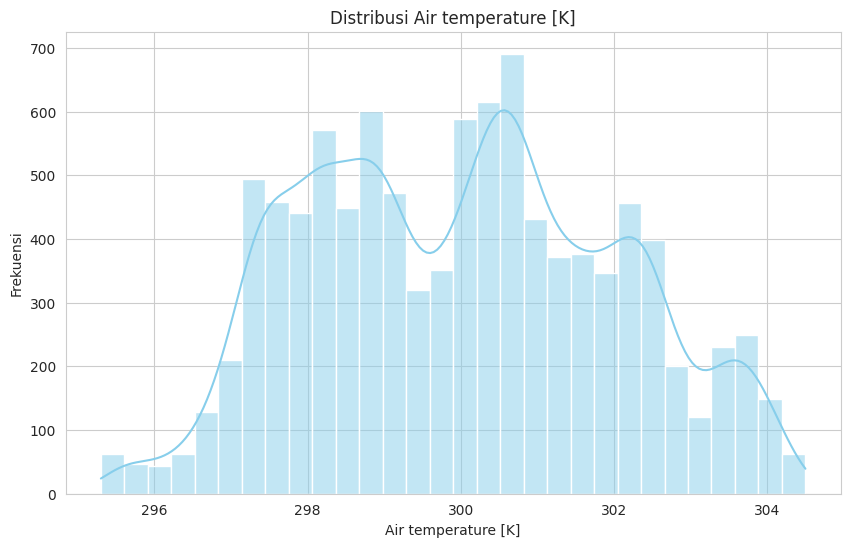

In [12]:
# Mengatur style
sns.set_style("whitegrid")

# Membuat plot distribusi
plt.figure(figsize=(10,6))
sns.histplot(dataset['Air temperature [K]'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Air temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Frekuensi')
plt.show()

**ChatGPT Prompt**

Berikan saya code untuk visualisasi kolom 'Type' dengan BarPlot dan PieChart berdampingan menggunakan latar belakang warna gelap

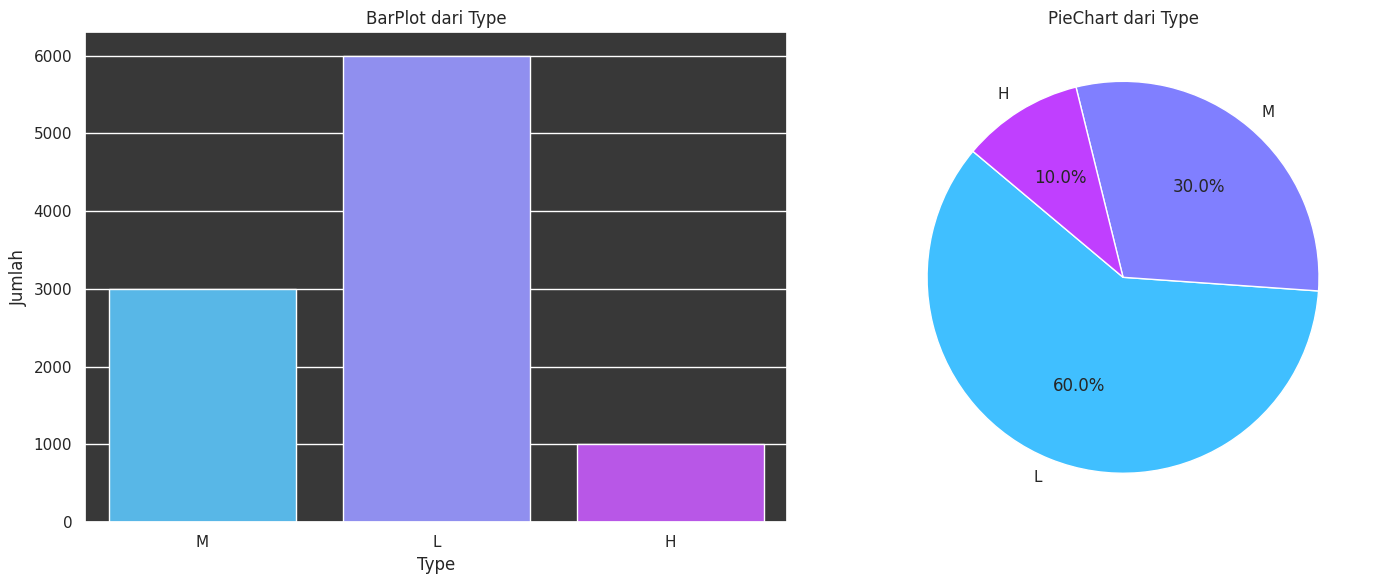

In [17]:
# Mengatur style latar belakang warna gelap
sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = '#383838'  # Warna latar belakang plot

# Membuat figure dan axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Membuat BarPlot untuk kolom 'Type'
sns.countplot(data=dataset, x='Type', ax=ax[0], palette="cool")
ax[0].set_title('BarPlot dari Type')
ax[0].set_ylabel('Jumlah')
ax[0].set_xlabel('Type')

# Membuat PieChart untuk kolom 'Type'
type_counts = dataset['Type'].value_counts()
ax[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool", n_colors=type_counts.shape[0]))
ax[1].set_title('PieChart dari Type')

plt.tight_layout()
plt.show()

**ChatGPT Prompt**

Berikan saya kode untuk menampilkan distribusi kolom 'Torque [Nm]' berdasarkan 'Type'' pada dataset menggunakan Library Seaborn

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


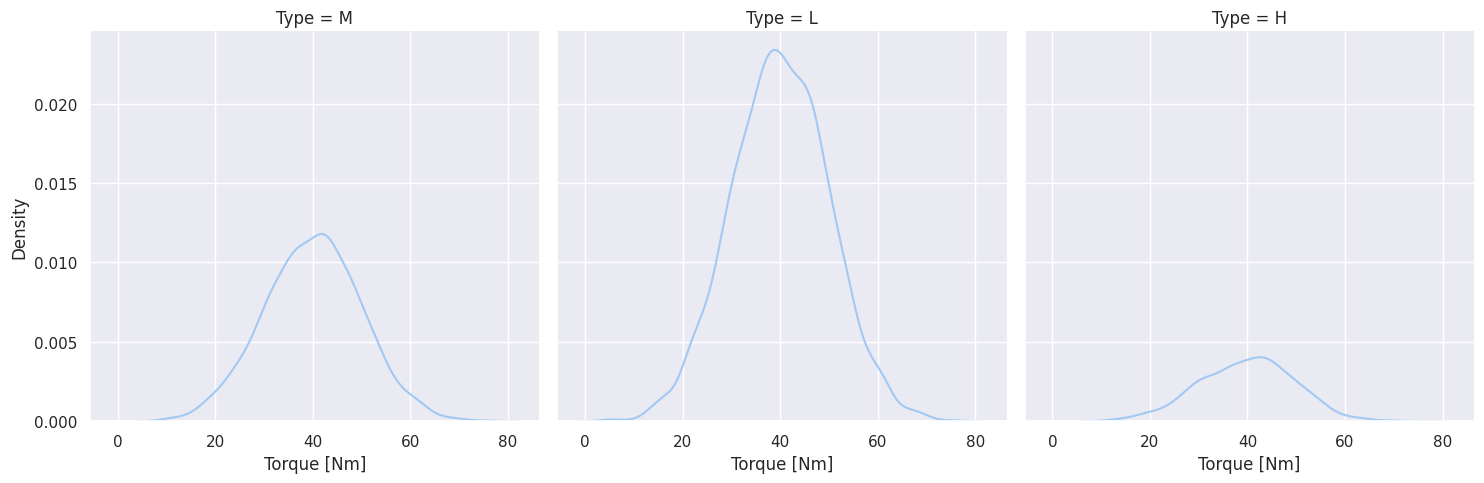

In [24]:
# Membuat plot distribusi
sns.displot(data=dataset, x="Torque [Nm]", col="Type", kind="kde")

plt.show()

**ChatGPT Prompt**

Berikan saya code untuk menampilkan presentase dan jumlah kategori pada kolom 'Target' dengan pie chart

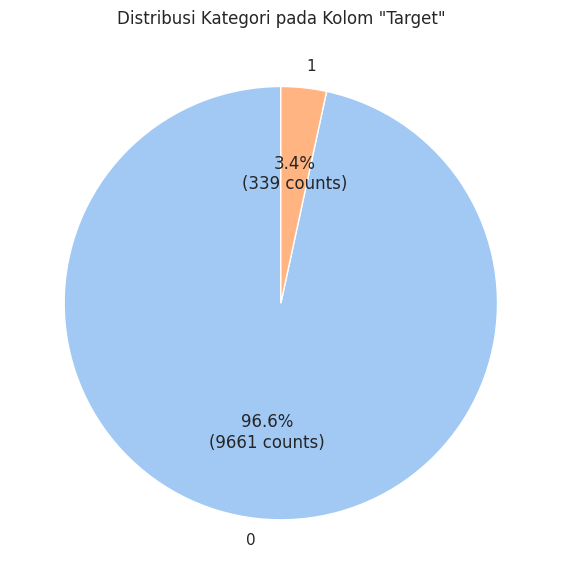

In [34]:
# Menghitung jumlah setiap kategori pada kolom 'Target'
target_counts = dataset['Target'].value_counts()

# Membuat pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(target_counts, labels=target_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f} counts)'.format(p, (p/100)*target_counts.sum()), startangle=90, colors=sns.color_palette("pastel", n_colors=target_counts.shape[0]))
ax.set_title('Distribusi Kategori pada Kolom "Target"')
plt.tight_layout()
plt.show()

**ChatGPT Prompt**

Berikan saya code untuk menampilkan visualisasi  jumlah kategori pada kolom 'Faillure Type'  dan tampilkan angkanya

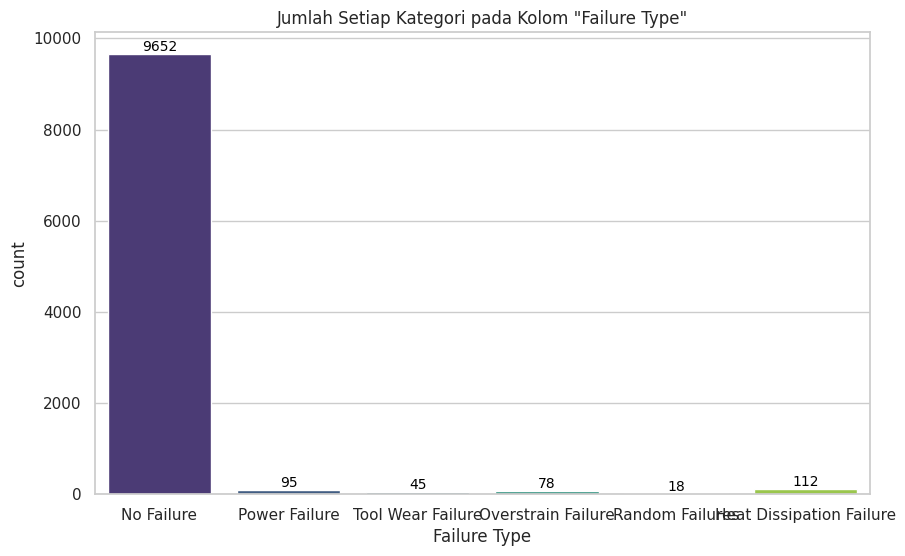

In [36]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=dataset, x='Failure Type', palette='viridis')

# Menambahkan jumlah/angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Jumlah Setiap Kategori pada Kolom "Failure Type"')
plt.show()

**ChatGPT Prompt**

Tampilkan visualisasi kolom 'Failure Type' tanpa kategori 'No Failure'

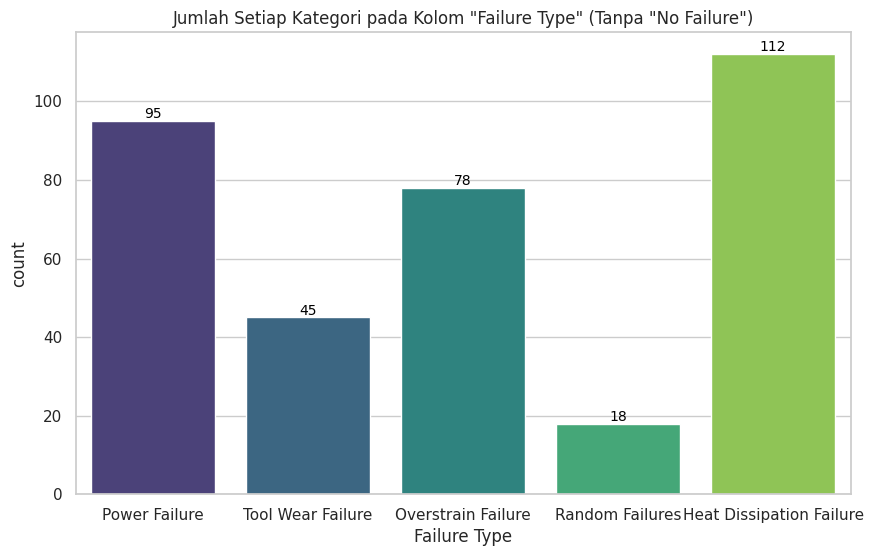

In [37]:
# Mengesampingkan data dengan kategori 'No Failure'
filtered_data = dataset[dataset['Failure Type'] != 'No Failure']

plt.figure(figsize=(10,6))
ax = sns.countplot(data=filtered_data, x='Failure Type', palette='viridis')

# Menambahkan jumlah/angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.title('Jumlah Setiap Kategori pada Kolom "Failure Type" (Tanpa "No Failure")')
plt.show()

**ChatGPT Prompt**

Berikan saya code untuk membuat 4 histogram berdampingan untuk kolom  'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', dan 'Torque [Nm]' dengan membedakan berdasarkan kolom 'Target' menggunakan Seaborn

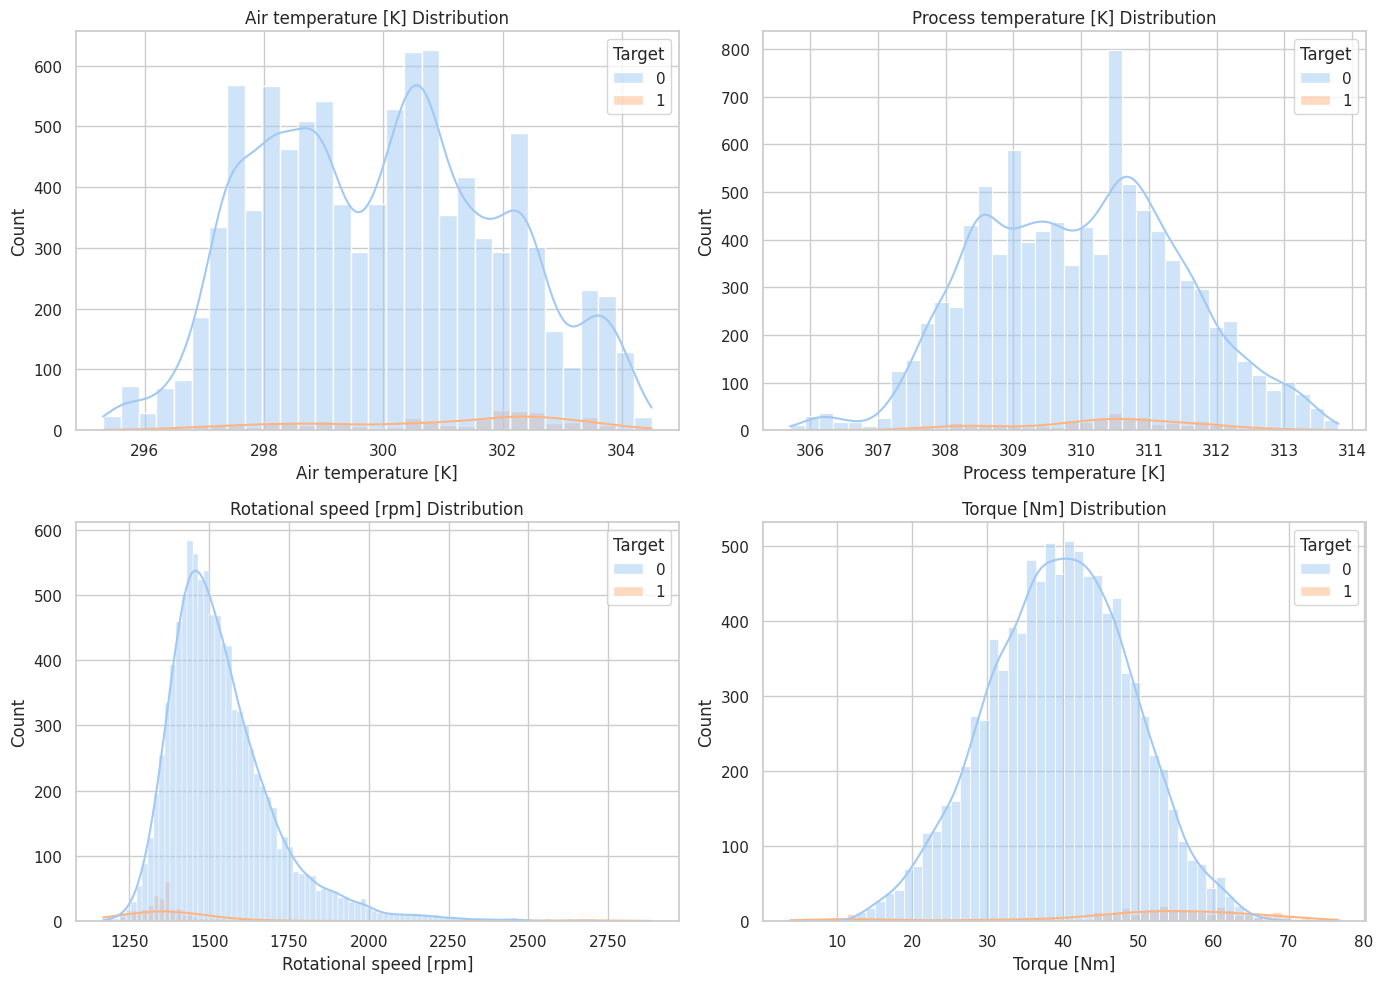

In [33]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot untuk 'Air temperature [K]'
sns.histplot(data=dataset, x="Air temperature [K]", hue="Target", kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Air temperature [K] Distribution')

# Plot untuk 'Process temperature [K]'
sns.histplot(data=dataset, x="Process temperature [K]", hue="Target", kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Process temperature [K] Distribution')

# Plot untuk 'Rotational speed [rpm]'
sns.histplot(data=dataset, x="Rotational speed [rpm]", hue="Target", kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Rotational speed [rpm] Distribution')

# Plot untuk 'Torque [Nm]'
sns.histplot(data=dataset, x="Torque [Nm]", hue="Target", kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Torque [Nm] Distribution')

plt.tight_layout()
plt.show()